In [24]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

import tensorflow.compat.v1 as tf # Corremos esto con tf v1
tf.disable_v2_behavior()

In [16]:
# Creamos nuestro dataset
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

In [17]:
# Resolucion del mapa de prediccion
res = 100

# Coordenadas del mapa de prediccion
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

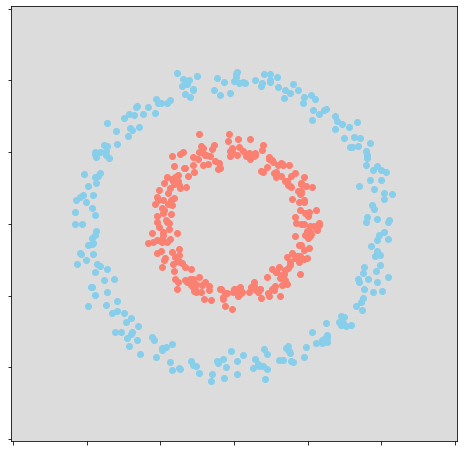

In [18]:
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [19]:
# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

2022-07-05 14:57:56.271185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-05 14:57:56.271238: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-05 14:57:56.271289: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (JIGC): /proc/driver/nvidia/version does not exist
2022-07-05 14:57:56.273777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 14:57:56.291599: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass 

Step 0 / 1000 - Loss =  0.44703525 - Acc = 0.5
Step 25 / 1000 - Loss =  0.39539915 - Acc = 0.51
Step 50 / 1000 - Loss =  0.31526354 - Acc = 0.496
Step 75 / 1000 - Loss =  0.23541631 - Acc = 0.65
Step 100 / 1000 - Loss =  0.1974996 - Acc = 0.662
Step 125 / 1000 - Loss =  0.16892809 - Acc = 0.726
Step 150 / 1000 - Loss =  0.1482877 - Acc = 0.8
Step 175 / 1000 - Loss =  0.13115285 - Acc = 0.858
Step 200 / 1000 - Loss =  0.11658361 - Acc = 0.91
Step 225 / 1000 - Loss =  0.103599 - Acc = 0.942
Step 250 / 1000 - Loss =  0.09181378 - Acc = 0.97
Step 275 / 1000 - Loss =  0.08108442 - Acc = 0.992
Step 300 / 1000 - Loss =  0.07163862 - Acc = 0.994
Step 325 / 1000 - Loss =  0.06317075 - Acc = 0.994
Step 350 / 1000 - Loss =  0.055585723 - Acc = 0.996
Step 375 / 1000 - Loss =  0.048921406 - Acc = 0.998
Step 400 / 1000 - Loss =  0.043126833 - Acc = 0.998
Step 425 / 1000 - Loss =  0.03815536 - Acc = 1.0
Step 450 / 1000 - Loss =  0.0338651 - Acc = 1.0
Step 475 / 1000 - Loss =  0.03021194 - Acc = 1.0
S

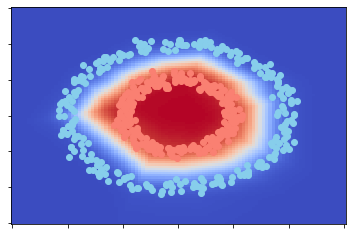

In [22]:
# ----- CÓDIGO ANIMACIÓN ----- #
from IPython.display import clear_output

for fr in range(len(iPY)):
  plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)


  clear_output(wait=True)
  plt.show()
